In [73]:
import pandas as pd
import math, statistics
import glob
import csv

path_ = r"C:/Users/erick/OneDrive/Desktop/MT-FBK-internship/on-off/on_spa/heroes*.csv"

# function to obtain number of prosodic phrases per segment and means,std devs of frequency and intensity for each phrase.

def fq_int_calc(path, tag='x'): # tag = on/off/mixed
    final_value_list = []
    final_pcount_list = []
    for fname in glob.glob(path):
        df = pd.read_csv(fname, delimiter='|')

        # fq_int = list containing mean freq and mean int for each segment. 
        #          It is a list of lists (prosodic phrases) of tuples (words).
        fq_int = []
        temp_l_ = []
        w_count = 0
        phrase_count = 0
        
        # phrases are delimited by silences longer than 0.25 secs or periods.
        for index, row in df.iterrows():
            w_count += 1
            if w_count == len(df):
                temp_l_.append((row.f0_mean_hz,row.i0_mean_db))
                fq_int.append(temp_l_)
                temp_l_ = []
                phrase_count += 1        
            elif(float(row.pause_after)) >= 0.25:
                temp_l_.append((row.f0_mean_hz,row.i0_mean_db))
                fq_int.append(temp_l_)
                temp_l_ = []
                phrase_count += 1
            elif row['punctuation_after'] == '.':
                # only periods
                temp_l_.append((row.f0_mean_hz,row.i0_mean_db))
                fq_int.append(temp_l_)
                temp_l_ = []
                phrase_count += 1
            else:
                temp_l_.append((row.f0_mean_hz,row.i0_mean_db))
        final_pcount_list.append([fname[-28:-4],str(len(fq_int))])

        n = 0 # to assign the prosodic phrase number to each row in the df
        for i in fq_int:
            temp_ = []
            temp_2 = []
            for k in i:
                temp_.append(k[0])
                temp_2.append(k[1])
            
            n = n+1
            try:
                name = (fname[-28:-3]+str(n))
                freq_mean = statistics.mean(temp_)
                freq_stdev = statistics.stdev(temp_)
                freq_stdev_cent = 1200*math.log2((freq_mean+freq_stdev)/freq_mean)
                int_mean = statistics.mean(temp_2)
                int_stdev = statistics.stdev(temp_2)
                
                vl = [name, freq_mean, freq_stdev, freq_stdev_cent, int_mean, int_stdev, str(tag)]
            # if segments consist of a single word, Stdev cannot be calculated, thus a value of 0 is assigned.
            except:
                name = (fname[-28:-3]+str(n))
                freq_mean = k[0]
                freq_stdev = 0
                int_mean = k[1]
                int_stdev = 0
    
                vl = [name, k[0], 0, 0, k[1], 0, str(tag)]
        final_value_list.append(vl)
        
    return final_value_list, final_pcount_list


In [74]:
# creating csv files with the results by calling the function created above

'''
with open('results_frequency_intensity_spa_on.csv', "w", newline='',encoding='utf-8') as f:
        csv_out=csv.writer(f)
        csv_out.writerow(['file_name','freq_mean', 'freq_stdev_hz', 'freq_stdev_cent', 'int_mean', 'int_stdev', 'on/off'])
        for row in fq_int_calc(path_, 'on')[0]:
            csv_out.writerow(row)
'''
            
with open('num_phrases_spa_on.csv', "w", newline='',encoding='utf-8') as f:
        csv_out=csv.writer(f)
        csv_out.writerow(['file_name','num_phrases'])
        for row in fq_int_calc(path_)[1]:
            csv_out.writerow(row)

In [31]:
# Comparing frequency and intensity between ENG ans SPA using pandas
# off-screen

import numpy as np
import pandas as pd

eng_data = r"C:/Users/erick/OneDrive/Desktop/results_frequency_intensity_eng_off.csv"
spa_data = r"C:/Users/erick/OneDrive/Desktop/results_frequency_intensity_spa_off.csv"

df_spa = pd.read_csv(spa_data)
df_eng = pd.read_csv(eng_data)

#dataframe with relevant data
df_diff = pd.DataFrame({'file_name': df_eng.file_name, 'freq_eng': df_eng.freq_stdev_cent, 'freq_spa': df_spa.freq_stdev_cent,
                       'int_eng': df_eng.int_stdev, 'int_spa': df_spa.int_stdev})

#removing anomalous phrases (e.g. 0 freq/int)
df_diff = df_diff.drop(df_diff[df_diff.freq_eng < 1].index)
df_diff = df_diff.drop(df_diff[df_diff.freq_spa < 1].index)
df_diff = df_diff.drop(df_diff[df_diff.int_eng < 1].index)
df_diff = df_diff.drop(df_diff[df_diff.int_spa < 1].index)

#new columns
df_diff['diff_freq_in_cents'] = np.where(df_diff['freq_eng'] == df_diff['freq_spa'], 0, df_diff['freq_eng'] - df_diff['freq_spa'])
df_diff['diff_freq_proportion'] = ((df_diff.freq_eng / df_diff.freq_spa) - 1)
df_diff['winner_freq'] = np.where(df_diff['freq_eng'] > df_diff['freq_spa'], 'ENG', 'SPA')
df_diff['diff_int_db'] = np.where(df_diff['int_eng'] == df_diff['int_spa'], 0, df_diff['int_eng'] - df_diff['int_spa'])
df_diff['winner_int'] = np.where(df_diff['int_eng'] > df_diff['int_spa'], 'ENG', 'SPA')

In [32]:
df_diff

,file_name,freq_eng,freq_spa,int_eng,int_spa,diff_freq_in_cents,diff_freq_proportion,winner_freq,diff_int_db,winner_int
1,2_10_eng_aligned_eng0004.1,455.432713,1232.732132,3.444803,1.000000,-777.299419,-0.630550,SPA,2.444803,ENG
4,2_10_eng_aligned_eng0019.2,1292.306532,1386.779031,3.714835,1.986063,-94.472499,-0.068124,SPA,1.728773,ENG
5,2_10_eng_aligned_eng0020.1,1059.867355,554.151828,4.386125,2.136976,505.715527,0.912594,ENG,2.249149,ENG
6,2_10_eng_aligned_eng0021.1,62.867557,1006.069635,3.763461,2.316607,-943.202078,-0.937512,SPA,1.446854,ENG
10,2_10_eng_aligned_eng0040.1,602.893566,419.736357,7.176060,3.480900,183.157209,0.436363,ENG,3.695159,ENG
...,...,...,...,...,...,...,...,...,...,...
1193,s3_9_eng_aligned_eng0287.1,1191.264279,1426.649648,4.535574,3.236694,-235.385369,-0.164992,SPA,1.298879,ENG
1196,s3_9_eng_aligned_eng0304.2,1084.807508,267.886333,1.527525,5.259911,816.921176,3.049507,ENG,-3.732386,SPA
1197,s3_9_eng_aligned_eng0315.2,210.748179,1286.206661,1.834848,2.250926,-1075.458483,-0.836147,SPA,-0.416078,SPA
1198,s3_9_eng_aligned_eng0316.5,204.368880,1714.476989,1.154701,2.292686,-1510.108109,-0.880798,SPA,-1.137986,SPA


In [37]:
diff_freq_sum = df_diff['freq_eng'].sum(axis=0, skipna = True) 
diff_int_sum = df_diff['int_eng'].sum(axis=0, skipna = True)
diff_freq_mean = diff_freq_sum/len(df_diff['freq_eng'])
diff_int_mean = diff_int_sum/len(df_diff['int_eng'])

# mean difference for frequency stdev (in cents) and intensity (in db)

print(diff_freq_mean, diff_int_mean)

752.9948521403574 3.2395660165259828


In [34]:
# pairwise comparison of frequency and intensity stdev. winner = element with the highest freq./int. stdev

df_diff.groupby('winner_freq').count(), df_diff.groupby('winner_int').count()

(             file_name  freq_eng  freq_spa  int_eng  int_spa  \
 winner_freq                                                    
 ENG                378       378       378      378      378   
 SPA                451       451       451      451      451   
 
              diff_freq_in_cents  diff_freq_proportion  diff_int_db  winner_int  
 winner_freq                                                                     
 ENG                         378                   378          378         378  
 SPA                         451                   451          451         451  ,
             file_name  freq_eng  freq_spa  int_eng  int_spa  \
 winner_int                                                    
 ENG               458       458       458      458      458   
 SPA               371       371       371      371      371   
 
             diff_freq_in_cents  diff_freq_proportion  winner_freq  diff_int_db  
 winner_int                                                          

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016DA84AFC88>]],
      dtype=object)

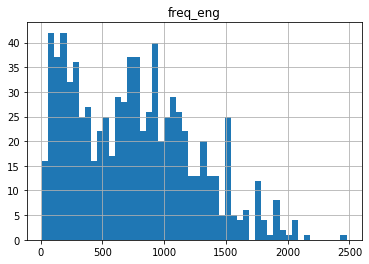

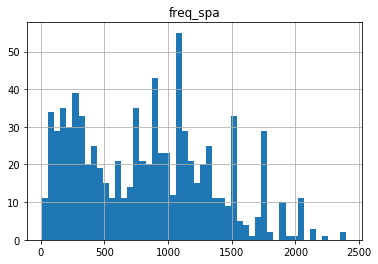

In [35]:
# distribution of frequency stdev (in cents) values at phrase level per language. 1- ENG; 2- SPA

df_diff.hist(column='freq_eng', bins=50)
df_diff.hist(column='freq_spa', bins=50)

In [3]:
# Pairwise comparison of prosodic phrases per segment

import pandas as pd
eng_data = r"C:/Users/erick/OneDrive/Desktop/num_phrases_eng_on.csv"
spa_data = r"C:/Users/erick/OneDrive/Desktop/num_phrases_spa_on.csv"

df_spa = pd.read_csv(spa_data)
df_eng = pd.read_csv(eng_data)

df_phrases = pd.DataFrame({'file_name': df_eng.file_name, 'eng_phrases': df_eng.num_phrases, 'spa_phrases': df_spa.num_phrases})

df_phrases

In [7]:
#get, for each pair, the element with the most phrases. If both have the same number of phrases, return 'NON'

df_phrases['winner'] = np.where(df_phrases.eng_phrases == df_phrases.spa_phrases, 'NON', 
         (np.where(df_phrases.eng_phrases < df_phrases.spa_phrases, 'SPA', 'ENG')))

In [8]:
df_phrases
df_phrases.groupby('winner').count()

,file_name,eng_phrases,spa_phrases
winner,,,
ENG,406,406,406
NON,3417,3417,3417
SPA,339,339,339


In [9]:
phrase_sum_e = df_phrases['eng_phrases'].sum(axis=0, skipna = True)
phrase_sum_s = df_phrases['spa_phrases'].sum(axis=0, skipna = True)

mean_phrase_eng = phrase_sum_e /len(df_phrases['eng_phrases'])
mean_phrase_spa = phrase_sum_s /len(df_phrases['spa_phrases'])

# mean number of phrases per segment

mean_phrase_eng, mean_phrase_spa

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016DB9D3EAC8>]],
      dtype=object)

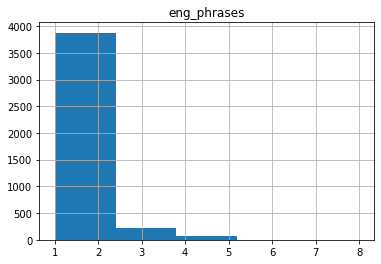

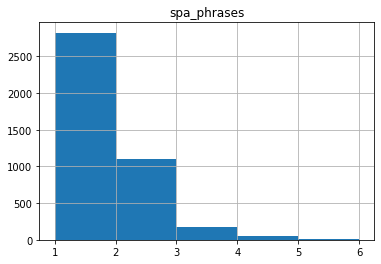

In [38]:
# distribution of number of phrases per segment per language

df_phrases.hist(column='eng_phrases', bins=5)
df_phrases.hist(column='spa_phrases', bins=5)